## CV2 install

In [1]:
!apt update && apt install -y python3-opencv
!pip install opencv-python


Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian-security buster/updates InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease



56 packages can be upgraded. Run 'apt list --upgradable' to see them.



python3-opencv is already the newest version (3.2.0+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
3 not fully installed or removed.
After this operation, 0 B of additional disk space will be used.

78Setting up python3-pkg-resources (40.8.0-1) ...
7Progress: [  0%] [..........................................................] 87Progress: [ 14%] [########..................................................] 8Fatal Python error: init_sys_streams: can't initialize sys standard streams
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/io.py", line 54, in <module>
ImportError: cannot import name 'open_code' from 'io' (unknown location)
Aborted (core dumped)
dpkg: error processing package pyt

## Data prep

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import listdir
import cv2

#list - vstup do priečinku, kde sa nachadzajú ďalšie priečinky(choroby) a v nich fotky chorôb
disease_types = os.listdir('/work/Trendy-BA/dataset')

#vypisanie chorôb
print(disease_types)
print("Types of diseases found:", len(disease_types))

['Seborrheic Keratoses and other Benign Tumors', 'Atopic Dermatitis', 'Melanoma']
Types of diseases found: 3


In [3]:
#list
diseases = []

#pridanie fotiek do listu s labelom
for item in disease_types:
    all_diseases = os.listdir('/work/Trendy-BA/dataset' + "/" +item)

    for disease in all_diseases:
        diseases.append((item, str('/work/Trendy-BA/dataset' + "/" +item) + "/" + disease))
        print(diseases[:1])

[('Seborrheic Keratoses and other Benign Tumors', '/work/Trendy-BA/dataset/Seborrheic Keratoses and other Benign Tumors/t-dermatofibroma-40.jpg')]
[('Seborrheic Keratoses and other Benign Tumors', '/work/Trendy-BA/dataset/Seborrheic Keratoses and other Benign Tumors/t-dermatofibroma-40.jpg')]
[('Seborrheic Keratoses and other Benign Tumors', '/work/Trendy-BA/dataset/Seborrheic Keratoses and other Benign Tumors/t-dermatofibroma-40.jpg')]
[('Seborrheic Keratoses and other Benign Tumors', '/work/Trendy-BA/dataset/Seborrheic Keratoses and other Benign Tumors/t-dermatofibroma-40.jpg')]
[('Seborrheic Keratoses and other Benign Tumors', '/work/Trendy-BA/dataset/Seborrheic Keratoses and other Benign Tumors/t-dermatofibroma-40.jpg')]
[('Seborrheic Keratoses and other Benign Tumors', '/work/Trendy-BA/dataset/Seborrheic Keratoses and other Benign Tumors/t-dermatofibroma-40.jpg')]
[('Seborrheic Keratoses and other Benign Tumors', '/work/Trendy-BA/dataset/Seborrheic Keratoses and other Benign Tumor

In [4]:
#vytvorenie dataframu, kde data obsahuju choroby a jednotlivých stlpcov - druh chodoby a fotka
disease_df = pd.DataFrame(data=diseases, columns=["disease type", "image"])
print(disease_df.head())
print(disease_df.tail())

                                   disease type  \
0  Seborrheic Keratoses and other Benign Tumors   
1  Seborrheic Keratoses and other Benign Tumors   
2  Seborrheic Keratoses and other Benign Tumors   
3  Seborrheic Keratoses and other Benign Tumors   
4  Seborrheic Keratoses and other Benign Tumors   

                                               image  
0  /work/Trendy-BA/dataset/Seborrheic Keratoses a...  
1  /work/Trendy-BA/dataset/Seborrheic Keratoses a...  
2  /work/Trendy-BA/dataset/Seborrheic Keratoses a...  
3  /work/Trendy-BA/dataset/Seborrheic Keratoses a...  
4  /work/Trendy-BA/dataset/Seborrheic Keratoses a...  
    disease type                                              image
650     Melanoma  /work/Trendy-BA/dataset/Melanoma/ISIC_6656563.jpg
651     Melanoma  /work/Trendy-BA/dataset/Melanoma/ISIC_6676705.jpg
652     Melanoma  /work/Trendy-BA/dataset/Melanoma/ISIC_6682360.jpg
653     Melanoma  /work/Trendy-BA/dataset/Melanoma/ISIC_6660247.jpg
654     Melanoma  /work

In [5]:
#počet fotiek v datasete
print("Total number of diseases in dataset: ", len(disease_df))

Total number of diseases in dataset:  655


In [6]:
#počet fotiek jednotlivých chodôb v datasete
disease_count = disease_df["disease type"].value_counts()
print("Examples in each category:" )
print(disease_count)

Examples in each category:
Seborrheic Keratoses and other Benign Tumors    288
Atopic Dermatitis                               267
Melanoma                                        100
Name: disease type, dtype: int64


In [7]:
path = "/work/Trendy-BA/dataset/"

#zmena velkosti fotiek
im_size = 300

#vytvorenie listov, kde uložime fotky zmenenej velkosti a labels
images = []
labels = []

#prechádzanie priečinkou a zmena veľkosti jednotlivých fotiek
for i in disease_types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path)]

    for f in filenames:
        img = cv2.imread(data_path + "/" + f)
        img = cv2.resize(img, (im_size,im_size))
        images.append(img)
        labels.append(i)

In [8]:
#transformácia podľa fotiek
images = np.array(images)

images.shape

(655, 300, 300, 3)

In [9]:
#delené najväčšou hodnotou pixelov
images = images.astype("float32") / 255.0

In [10]:
images.shape

(655, 300, 300, 3)

In [11]:
#transformácia nazvov chodôb na číselne hodnoty
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y = disease_df["disease type"]
print(y[:5])

0    Seborrheic Keratoses and other Benign Tumors
1    Seborrheic Keratoses and other Benign Tumors
2    Seborrheic Keratoses and other Benign Tumors
3    Seborrheic Keratoses and other Benign Tumors
4    Seborrheic Keratoses and other Benign Tumors
Name: disease type, dtype: object


In [12]:
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform (y)
print(y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [13]:
#rozdelenie dat na testovacie a trenovacie
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, y = shuffle(images, y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.05, random_state=415)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(622, 300, 300, 3)
(33, 300, 300, 3)
(622,)
(33,)


## Image classification with Keras

In [14]:
import keras
import tensorflow as tf

#vytvorenie modelu
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(300,300,3)),
    keras.layers.Dense(256, activation=tf.nn.tanh),
    
    keras.layers.Dense(3,activation=tf.nn.softmax)
])

2023-01-28 21:40:12.337192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-28 21:40:12.459732: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-28 21:40:12.464354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-28 21:40:12.464377: I tensorflow

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 270000)            0         
                                                                 
 dense (Dense)               (None, 256)               69120256  
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 69,121,027
Trainable params: 69,121,027
Non-trainable params: 0
_________________________________________________________________


In [16]:
#kompilácia modelu
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(),loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
#požadovaná přesnost modelu
accuracy_threshold = 0.5

#trenovanie modelu
for i in range(5):
    model.fit(train_x, train_y, epochs=1)
    _, accuracy = model.evaluate(train_x, train_y)
    if accuracy >= accuracy_threshold:
        break

20/20 [==============================] - 1s 42ms/step - loss: 1.0212 - accuracy: 0.4389


In [18]:
#predikcia modelu
y_pred = model.predict(test_x)
y_pred

2/2 [==============================] - 0s 6ms/step


array([[0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.400866  , 0.12902857, 0.47010547],
       [0.

## User input

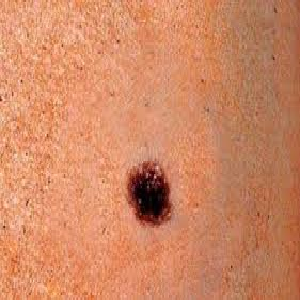

In [19]:
from tensorflow.keras.utils import load_img

#input fotky, ktorú chceme rozpoznať
image = load_img("/work/Trendy-BA/Photo for testing/rakovina2.jfif", target_size=(300,300))
image

In [20]:
#premena fotky z pixelov
image = np.array(image)
image.shape

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [21]:
#predikcia fotky
prediction = model.predict(image)
prediction


1/1 [==============================] - 0s 50ms/step


array([[0.400866  , 0.12902857, 0.47010547]], dtype=float32)

In [22]:
highest_value_index = prediction.argmax()
highest_value_class = disease_types[highest_value_index]

print("Na fotografii je s největší pravděpodobností: " + highest_value_class + "\n")

print("Pravděpodobnosti jednotlivých kategorií:")
for i in range(len(prediction[0])):
    class_name = disease_types[i]
    class_value = prediction[0][i]
    print(class_name, class_value)



Na fotografii je s největší pravděpodobností: Melanoma

Pravděpodobnosti jednotlivých kategorií:
Seborrheic Keratoses and other Benign Tumors 0.400866
Atopic Dermatitis 0.12902857
Melanoma 0.47010547


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41726fb2-08fd-474a-b0c8-8ae358b6b158' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>